##  Première analyse : Mots-clés et nuage de mots 

In [ ]:
import os
import yake
from datetime import datetime
import os
import sys
import nltk
import re
from nltk.tokenize import sent_tokenize

In [ ]:
# Le répertoire qui contient vos fichiers txt exportés de Camille
indir = "../data/camille_vaccination_/"
# Le répertoire qui contiendra les fichiers txt nettoyés
outdir = "../data/txt_clean2"

if not os.path.exists(outdir):
    os.mkdir(outdir)

In [ ]:
query = ["vaccination","vaccin"]

In [ ]:
# Création d'une regex afin de trouver les mots de la liste query dans le texte
regex = re.compile(f"\\b({'|'.join(query)})\\b", re.IGNORECASE)

In [ ]:
for file in os.listdir(indir)[:150]:
    if file.endswith(".txt"):
        relevant_sentences = []
        f_in = open(os.path.join(indir, file), encoding="utf-8")
        text = f_in.read()
        for sentence in sent_tokenize(text):
            if regex.search(sentence):
                relevant_sentences.append(sentence)
        f_in.close()
        f_out = open(os.path.join(outdir, file), "w", encoding="utf-8")
        f_out.write("\n\n".join(relevant_sentences))
        f_out.close()

In [ ]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [ ]:
# Lister les Fichiers
data_path = "../data/txt_clean2"
files = os.listdir(data_path)

In [ ]:
for f in sorted(files)[:1000]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

## Nuage de mots 

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

In [ ]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem","rue", "villa","louer",
       "maison","fr","app","ch","vendre","prix","bel","av","jard","Libre","jardin","vue",
       "téléphone","centre","terrain"]
sw = set(sw)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import os

# Télécharger les stopwords si ce n'est pas déjà fait
import nltk
nltk.download('stopwords')

# Liste des stopwords du français
sw = set(stopwords.words("french"))

# Ajout de mots personnalisés à la liste des stopwords
custom_sw = [
    "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
    "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
    "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
    "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
    "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "villa", "louer",
    "maison", "fr", "app", "ch", "vendre", "prix", "bel", "av", "jard", "Libre", "jardin", "do"
    "a", "vue", "téléphone", "centre", "terrain", "déjà","ot","u","qu'il","or", "qu'une","l'a"
]

# Ajout des mots personnalisés à la liste des stopwords
sw.update(custom_sw)

data_path = "../data/txt_clean2"

if os.path.isdir(data_path):
    files = os.listdir(data_path)
    
    combined_text = ""
    for file_name in files:
        file_path = os.path.join(data_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                file_text = file.read()
                combined_text += file_text + " "
    
    # Créer un nuage de mots en excluant les stopwords
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=sw).generate(combined_text)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Le chemin spécifié n'est pas un répertoire valide.")


##  Analyse entités nommées 

In [ ]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences


In [ ]:
nlp = spacy.load('fr_core_news_md')

In [ ]:
import os

# Chemin du dossier contenant les fichiers
dossier = "../data/txt_clean2"

# Chemin du dossier où sera enregistré le fichier de sortie
dossier_sortie = "../data"

# Nom du fichier à créer
nom_fichier_sortie = "fichier.txt"

# Chemin complet du fichier de sortie
chemin_fichier_sortie = os.path.join(dossier_sortie, nom_fichier_sortie)

# Ouvre le fichier de sortie en mode écriture
with open(chemin_fichier_sortie, 'w') as fichier_sortie:
    # Parcourt tous les fichiers du dossier
    for nom_fichier in os.listdir(dossier):
        chemin_fichier = os.path.join(dossier, nom_fichier)
        # Vérifie si c'est bien un fichier texte
        if os.path.isfile(chemin_fichier) and nom_fichier.endswith('.txt'):
            # Lit le contenu du fichier et l'écrit dans le fichier de sortie
            with open(chemin_fichier, 'r') as fichier_entree:
                contenu = fichier_entree.read()
                fichier_sortie.write(contenu)
                fichier_sortie.write("\n")  # Ajoute une ligne entre chaque fichier

print(f"Le fichier {nom_fichier_sortie} a été créé avec succès dans le dossier 'data' en combinant les fichiers du dossier 'txt_clean'.")


In [ ]:
# Charger le texte
n=100000
text = open("../data/fichier.txt", encoding='utf-8').read()[:n]


In [ ]:
%%time
# Traiter le texte

doc = nlp(text)

In [ ]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [ ]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

## Analyse de sentiment tous les 10 ans 

In [ ]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [ ]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

##  Phrases de 1880

In [367]:
get_sentiment( "il faudrait rendre la vaccination obligatoire en Belgique.")

This text is 20% negative and 0.5% subjective.


In [368]:
get_sentiment("Il faut que la vaccination soit obligatoire, comme elle l'est dans tous les pays de l'Europe, sauf en Belgique, en France, en Russie et en Turquie.")

This text is 1% positive and 0.3% subjective.


In [369]:
get_sentiment(" Il y a des instituts vaccinaux, et dans la pensée du gouvernement il s'agit d'établir en province des dépôts de vaccin où l'on pourra se le procurer gratuitement.")

This text is neutral and perfectly objective.


In [370]:
get_sentiment("En effet, dans toutes les zones géographiques où la vaccination et l'examen systématique des enfants ont été réalisés de manière sérieuse, où la vaccination a été appliquée sans exception, il n'a pas été nécessaire de rechercher, pendant une période d'un an, même durant une épidémie, un seul cas de décès causé par la variole.")

This text is 18% positive and 0.3333333333333333% subjective.


## Phrases de 1900

In [357]:
get_sentiment("Quant aux remèdes préventifs, il y en a deux ; l'un consiste dans la vaccination, l'autre dans l'emploi de mesures sanitaires propres à arrêter la contagion.")

This text is 4% positive and perfectly objective.


In [358]:
get_sentiment("La vaccination s'est peu répandue dans la pratique.")

This text is 8% positive and 0.175% subjective.


In [355]:
get_sentiment("A l'étranger, les pays qui ont décidé la vaccination obligatoire et où ia vaccination est généralisée, sont restés indemnes do cette infection  meutriere.")

This text is 10% negative and 0.43333333333333335% subjective.


In [356]:
get_sentiment("Si le vaccin de la fièvre aphteuse est encore à .Touver, celui du rouget du porc est découvert iepuls longtemps, mais il n'eBt pas employé autant qu'il devrait l'être.")

This text is 10% positive and 0.35% subjective.


## Phrases 1870

In [359]:
get_sentiment("Or, d'après la nouvelle doctrine, la vaccination directe de l'animal malade à l'homme est seule un préservatif contre l'épouvantable variole et ie vaccin aurait dégénéré dans ces dernières années comme... comme fa littérature et l'art.")

This text is 21% negative and 0.19285714285714284% subjective.


In [360]:
get_sentiment("Il prouve que ce vaccin est toujours aussi pur, aussi efficace, aussi préservateur que du temps de Jenner.")

This text is 45% positive and 0.4% subjective.


In [361]:
get_sentiment("Et en Belgique, il faudrait payer le vaccin provenant de la fabrique de l'Etat !")

This text is neutral and perfectly objective.


In [362]:
get_sentiment("La dépense que nécessite la vaccination des enfants pauvres est une dépense obligatoire pour les communes, en vertu de l'article 13 1 de la loi communale, et les députalions permanentes seraient fondées, même en l'absence de tout règlement provincial, it l'inscrire d'offleo aux budgets des communes, par application de l'article dont il s'agit.")

This text is 3% negative and 0.2285714285714286% subjective.


## Phrases 1890

In [364]:
get_sentiment("Un jugement du tribunal de Francfort, sanctionne par un arrêt du tribunal suprême, a décidé que le fait de ne pas faire vacciner ses enfants pouvait donner lieu à une condamnation, mais qu'une fois cette condamnation subie, le pouvoir de l'autorité était épuisé et qu'elle ne pouvait contraindre les parents qui s'opposaient à la vaccination.")

This text is 3% positive and 0.5666666666666667% subjective.


In [363]:
get_sentiment(" L'honorable sénateur de Liège avait préconisé aussi la vaccination obligatoire, invoquant à ce propos de nombreuses autorités")

This text is 10% positive and 0.4666666666666666% subjective.


In [371]:
get_sentiment("La muselière abolit la rage ; la vaccination et la revaccination obligatoires abolirent la variole.")

This text is 20% negative and 0.5% subjective.


In [366]:
get_sentiment("Un professeur de Varsovie a présenté un rapport sur la vaccination contre l'hydropho- bie et a exprimé la conviction que dans la plupart des cas la vaccination assure la guérison d.i malade.")

This text is 35% negative and 0.4% subjective.


## Analyse : clustering sur les 3 décennies de la période étudiée

In [442]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [443]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\louel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [444]:
data_path = "../data/txt_clean2"

## Décénie 1870

In [445]:
DECADE = '1870'

In [446]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [447]:
# Exemple de fichiers
files[:5]

['KB_JB555_1870-02-20_01-00001.txt',
 'KB_JB555_1870-03-05_01-00001.txt',
 'KB_JB555_1870-07-26_01-00004.txt',
 'KB_JB555_1870-12-20_01-00002.txt',
 'KB_JB555_1871-01-10_01-00001.txt']

In [450]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

FileNotFoundError: [Errno 2] No such file or directory: '../data/txt_clean2KB_JB555_1870-02-20_01-00001.txt'

In [451]:
# Exemple de textes
texts[0][:400]

'KB_JB421_1899-03-20_01-00002.txt'

In [452]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [453]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.9,
    min_df=1,
    lowercase=True)

In [454]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\louel\Desktop\MA2 stic\Traitement automatique de corpus\TP\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [455]:
# Détail de la matrice
tfidf_vectors

<58x58 sparse matrix of type '<class 'numpy.float64'>'
	with 58 stored elements in Compressed Sparse Row format>

In [456]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

kb_jb421_1899-03-20_01-00002.txt    1.0
kb_jb555_1897-09-19_01-00001.txt    0.0
kb_jb555_1895-04-14_01-00001.txt    0.0
kb_jb555_1895-04-21_01-00001.txt    0.0
kb_jb555_1895-04-21_01-00006.txt    0.0
kb_jb555_1895-08-31_01-00002.txt    0.0
kb_jb555_1895-09-29_01-00001.txt    0.0
kb_jb555_1896-04-10_01-00003.txt    0.0
kb_jb555_1896-06-28_01-00006.txt    0.0
kb_jb555_1896-08-05_01-00001.txt    0.0
kb_jb555_1896-11-09_01-00001.txt    0.0
kb_jb555_1897-01-17_01-00005.txt    0.0
kb_jb555_1897-01-29_01-00001.txt    0.0
kb_jb555_1897-06-12_01-00002.txt    0.0
kb_jb555_1897-09-19_01-00003.txt    0.0
kb_jb421_1899-05-27_01-00003.txt    0.0
kb_jb555_1897-12-20_01-00003.txt    0.0
kb_jb555_1898-02-28_01-00003.txt    0.0
kb_jb555_1898-03-11_01-00001.txt    0.0
kb_jb555_1898-03-11_01-00003.txt    0.0
kb_jb555_1898-03-21_01-00003.txt    0.0
kb_jb555_1898-07-07_01-00003.txt    0.0
kb_jb555_1898-07-28_01-00001.txt    0.0
kb_jb555_1898-08-07_01-00001.txt    0.0
kb_jb555_1898-08-14_01-00005.txt    0.0


In [457]:
tfidf_array = tfidf_vectors.toarray()

In [458]:
N_CLUSTERS = 2

In [459]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [460]:
clusters = km_model.fit_predict(tfidf_vectors)

c:\Users\louel\Desktop\MA2 stic\Traitement automatique de corpus\TP\tac\tac_venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [461]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

IndexError: list index out of range

In [462]:
pprint(dict(clustering))

{0: ['KB_JB555_1870-02-20_01-00001.txt',
     'KB_JB555_1870-03-05_01-00001.txt',
     'KB_JB555_1870-07-26_01-00004.txt',
     'KB_JB555_1870-12-20_01-00002.txt',
     'KB_JB555_1871-01-10_01-00001.txt',
     'KB_JB555_1871-01-22_01-00003.txt',
     'KB_JB555_1871-01-30_01-00003.txt',
     'KB_JB555_1871-02-06_01-00001.txt',
     'KB_JB555_1871-05-16_01-00004.txt',
     'KB_JB555_1872-06-12_01-00003.txt',
     'KB_JB555_1872-08-30_01-00001.txt',
     'KB_JB555_1872-11-20_01-00003.txt',
     'KB_JB555_1873-03-19_01-00003.txt',
     'KB_JB555_1874-03-12_01-00002.txt',
     'KB_JB555_1874-10-29_01-00003.txt',
     'KB_JB555_1876-10-09_01-00001.txt',
     'KB_JB555_1877-01-04_01-00002.txt',
     'KB_JB555_1877-02-01_01-00001.txt',
     'KB_JB555_1877-07-13_01-00001.txt',
     'KB_JB555_1877-07-14_01-00001.txt',
     'KB_JB555_1877-07-18_01-00001.txt',
     'KB_JB555_1877-07-21_01-00001.txt',
     'KB_JB555_1877-07-23_01-00001.txt',
     'KB_JB555_1877-07-30_01-00003.txt',
     'KB_JB555_1

In [463]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [464]:
reduced_vectors[:10]

array([[ 1.10557244e-18, -3.63547042e-18],
       [-8.28092144e-03, -4.85180524e-02],
       [-6.15844027e-02,  3.00389917e-02],
       [-2.03153951e-02,  2.44957426e-02],
       [ 1.10281891e-03, -1.89134933e-02],
       [ 7.97303375e-02, -4.07984624e-02],
       [-2.09195122e-02,  2.01337190e-03],
       [-3.21730510e-02,  8.82174531e-03],
       [-7.28206055e-03, -3.93021677e-03],
       [ 9.00431714e-02,  8.10829326e-02]])

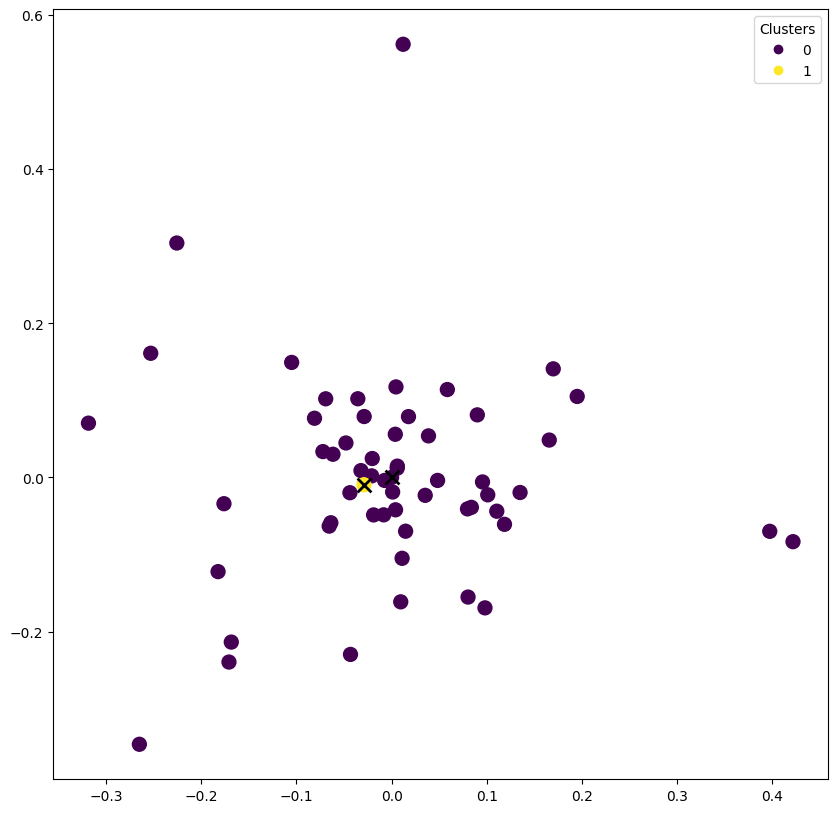

In [465]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [466]:

# Récupération des étiquettes de cluster pour chaque document
labels = km_model.labels_

# Créer un dictionnaire pour stocker les documents de chaque cluster
clusters_documents = {}
for i, label in enumerate(labels):
    if label not in clusters_documents:
        clusters_documents[label] = []
    clusters_documents[label].append(i)  # Ajouter l'index du document au cluster correspondant

for cluster_label, documents_indices in clusters_documents.items():
    print(f"Cluster {cluster_label}:")
    for doc_index in documents_indices:
        print(texts[doc_index])  # Afficher le document correspondant à l'indice
    print("\n")  # Ajouter un saut de ligne entre les clusters

Cluster 0:
KB_JB421_1899-03-20_01-00002.txt
KB_JB421_1899-05-27_01-00003.txt
KB_JB421_1899-06-01_01-00003.txt
KB_JB421_1899-11-30_01-00002.txt
KB_JB421_1899-12-11_01-00002.txt
KB_JB555_1890-05-10_01-00001.txt
KB_JB555_1890-06-19_01-00002.txt
KB_JB555_1890-07-20_01-00002.txt
KB_JB555_1890-08-13_01-00002.txt
KB_JB555_1890-10-01_01-00002.txt
KB_JB555_1891-01-04_01-00002.txt
KB_JB555_1891-02-16_01-00001.txt
KB_JB555_1891-03-19_01-00001.txt
KB_JB555_1892-03-26_01-00002.txt
KB_JB555_1892-09-15_01-00001.txt
KB_JB555_1892-09-19_01-00003.txt
KB_JB555_1892-10-25_01-00003.txt
KB_JB555_1893-07-05_01-00001.txt
KB_JB555_1893-07-21_01-00001.txt
KB_JB555_1893-07-23_01-00001.txt
KB_JB555_1893-09-02_01-00001.txt
KB_JB555_1894-01-29_01-00003.txt
KB_JB555_1894-02-22_01-00001.txt
KB_JB555_1894-05-26_01-00001.txt
KB_JB555_1894-10-06_01-00001.txt
KB_JB555_1894-10-15_01-00004.txt
KB_JB555_1894-10-25_01-00002.txt
KB_JB555_1894-11-17_01-00001.txt
KB_JB555_1894-11-28_01-00001.txt
KB_JB555_1895-02-05_01-00001.txt

In [467]:
import os
import yake
from collections import Counter
from nltk.corpus import stopwords
import re

In [468]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [469]:

# Charger les mots vides de la langue correspondante 
stop_words = set(stopwords.words("french"))

# Ajouter des mots à la liste des stop words
additional_stop_words = ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
                        "ils", "elles", "il", "elle", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
                        "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
                        "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
                        "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "si", "car", "autant",
                        "toute", "très", "bien", "aucun", "comme", "celui", "chaque", "plusieurs",
                        "toutes", "trop", "aucune", "parce", "quelques", "quel", "quelle", "quels",
                        "quelles", "lorsqu", "lorsque", "dès", "dans", "leurs", "peu", "toute", "toutes",
                        "DÈS", "près", "quart", "part", "ETC", "demi", "bas", "grand", "demande", "vers",
                        "avant", "vers","aussi","ans","leurs","très"]

# Parcours chaque cluster
for cluster_label, documents_indices in clusters_documents.items():
    print(f"Mots-clés fréquents pour le cluster {cluster_label}:")
    
    # Collecter tous les mots non vides, non numériques et ne contenant pas une seule lettre de tous les documents du cluster
    all_words = []
    for doc_index in documents_indices:
        text = texts[doc_index]
        words = re.findall(r'\b[A-Za-zÀ-ÿ]+\b', text)  # Trouver les mots alphabétiques
        # Filtrer les mots vides, les mots qui sont des chiffres et les mots d'une seule lettre
        words = [word for word in words if word.lower() not in stop_words and not word.isdigit() and len(word) > 1]
        all_words.extend(words)  # Ajouter les mots satisfaisant les critères à la liste
    
    # Calculer la fréquence des mots non vides, non numériques et ne contenant pas une seule lettre
    word_freq = Counter(all_words)
    
    # Sélectionner les mots les plus fréquents
    top_keywords = word_freq.most_common(200)
    
    # Afficher les mots-clés fréquents pour ce cluster
    for keyword, frequency in top_keywords:
        print(f"Mot-clé: {keyword}, Fréquence: {frequency}")
    print("\n")  # Saut de ligne entre les clusters

Mots-clés fréquents pour le cluster 0:
Mot-clé: txt, Fréquence: 57


Mots-clés fréquents pour le cluster 1:
Mot-clé: txt, Fréquence: 1




Nuage de mots pour le cluster 0:


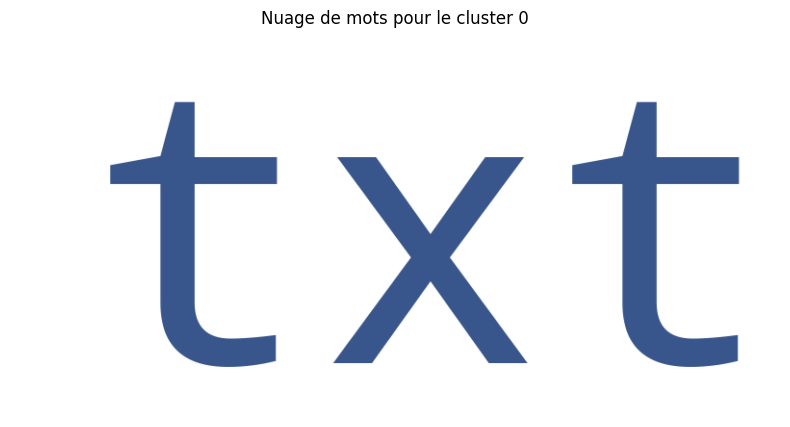

Nuage de mots pour le cluster 1:


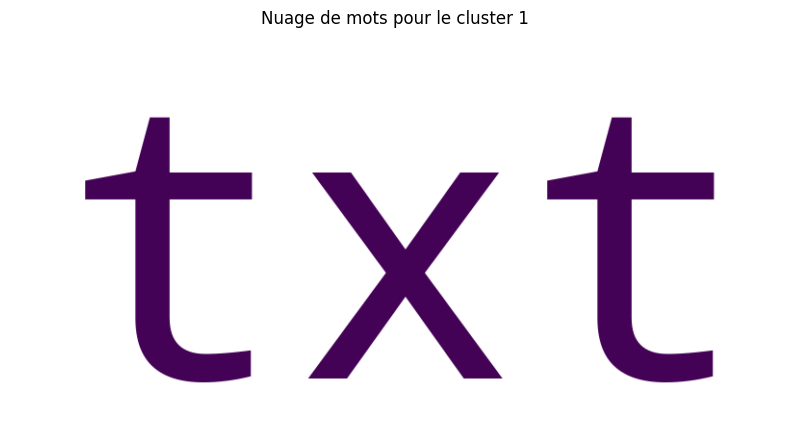

In [470]:
# Parcours chaque cluster
for cluster_label, documents_indices in clusters_documents.items():
    print(f"Nuage de mots pour le cluster {cluster_label}:")
    
    
    # Créer une chaîne de mots pour le nuage de mots
    wordcloud_text = ' '.join([keyword for keyword, _ in top_keywords])
    
    # Créer et afficher le nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mots pour le cluster {cluster_label}")
    plt.show()